In [1]:
import fasttext
import pandas as pd
from scipy import spatial
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("all_manually_annotated.csv", index_col=0)
df

,class,word,sentence1,sentence2
0,0,kap,"prostituiranjem občasno je počel tudi to , me...",Kapa gre v Pariz
1,1,kap,ko pa zdajle ta video vidim me je pa skor ka...,čingola da te rasvetlim bila je možganska ka...
2,0,kap,"odgovor, ne sme vas presenetiti in vas zadeti...",je avgusta 2009 med potapljanjem na hrvaškem ...
3,0,kap,"piva, ki naj bi ga spil Pahor, skoraj kap .",Od jeze si je strojevodja snel z glave železn...
4,0,kap,"smučarske čevlje, hlače, bundo, rokavice in v...",IMK ishemična možganska kap ali infarkt
...,...,...,...,...
559,1,vila,Namesto penziona Oliva pride Vila Čeranič***,"...] obširen borov gozd, posejan z vilami , ..."
560,1,vila,parc. št. 317/3 (s t.i. » Vilo Vogler«) ter ...,"vložilo veliko denarja v obnovo vile, ki je p..."
561,1,vila,"Ridi a... ratis), Trnovlje pri vili : v Štan...",tokrat je le naredil izjemo. Spal je v znamen...
562,1,vila,"Bližnji stanovalci trdijo, da namerava kitajs...",bila narejena v čast španskemu slikarju Salva...


In [3]:
model = fasttext.load_model("embed.sl-token.ft.sg.bin")

In [5]:
df_pos = df.loc[df["class"] == 1]
df_neg = df.loc[df["class"] == 0]
df_neg

,class,word,sentence1,sentence2
0,0,kap,"prostituiranjem občasno je počel tudi to , me...",Kapa gre v Pariz
2,0,kap,"odgovor, ne sme vas presenetiti in vas zadeti...",je avgusta 2009 med potapljanjem na hrvaškem ...
3,0,kap,"piva, ki naj bi ga spil Pahor, skoraj kap .",Od jeze si je strojevodja snel z glave železn...
4,0,kap,"smučarske čevlje, hlače, bundo, rokavice in v...",IMK ishemična možganska kap ali infarkt
5,0,kap,"moškega nižje postave, v temno oblečenega, s ...","reakcijo na osvetlitev. Težko je oceniti, ali..."
...,...,...,...,...
546,0,vila,"ena najponosnejših stavb, ki še sanja o prete...",Vile pripovedujejo o --- odgovornosti / [av...
552,0,vila,"na odseku Kozina–Ankaran, kjer so novoodkrite...","ki je trdil, da je tudi sam že videl vile , ..."
554,0,vila,vendar steza pod strmo zaporo še zadnjič zavi...,starejše deklice se že rade oblečejo v prince...
556,0,vila,. Tisto grozno jutranje vstajanje … In so se ...,"je dobrodelno društvo, ki so ga ustanovile št..."


In [6]:
neg_diff = []
pos_diff = []

for i in df_neg.index:
    one = model.get_sentence_vector(df_neg.sentence1[i])
    two = model.get_sentence_vector(df_neg.sentence2[i])
    res = spatial.distance.cosine(one, two)
    neg_diff.append(res)

for i in df_pos.index:
    one = model.get_sentence_vector(df_pos.sentence1[i])
    two = model.get_sentence_vector(df_pos.sentence2[i])
    res = spatial.distance.cosine(one, two)
    pos_diff.append(res)


In [9]:
y = np.asarray(neg_diff, dtype=np.float32)
print(np.mean(pos_diff, axis=0))
print(max(pos_diff))
print(min(pos_diff))
print()
print(np.mean(neg_diff, axis=0))
print(max(neg_diff))
print(min(neg_diff))

0.21953402675212697
0.8270665109157562
0.06669443845748901

0.2666572135847308
0.9993428747984581
0.06771844625473022


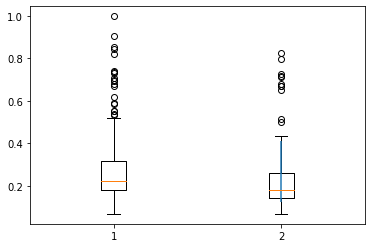

In [10]:
plt.boxplot([neg_diff, pos_diff])
plt.errorbar(2, np.mean(y, axis=0), yerr=np.std(y, axis=0))
plt.show()

In [4]:
cls = []

for i in df.index:
    one = model.get_sentence_vector(df.sentence1[i])
    two = model.get_sentence_vector(df.sentence2[i])
    res = spatial.distance.cosine(one, two)
    if res < 0.24:
        cls.append(1)
    else:
        cls.append(0)

(0.5632692307692309, 0.5595744680851064, 0.5318852151190863, None)


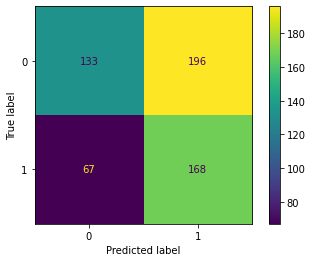

In [6]:
from sklearn import metrics
import matplotlib.pyplot as plt

base = df["class"]
classes = [0,1]
c = metrics.confusion_matrix(base, cls, labels=classes)
disp = metrics.ConfusionMatrixDisplay(c, display_labels=classes)
disp.plot()
print(metrics.precision_recall_fscore_support(base, cls, average="macro"))
plt.savefig("cm_ft.jpg")